# Lab 4: Classification

## Introduction

In this lab, we will perform a classification analysis using a dataset that was cleaned and labeled in Computer Practice 2. Our goal is to classify the data into two distinct classes based on the labels from the previous clustering analysis. We will use various classification techniques, including discriminant analysis and logistic regression, to evaluate the performance of our models. This process will involve splitting the data, scaling features, and assessing the models using several metrics to determine their effectiveness. By the end of this lab, we will have a better understanding of how well our classifiers perform and which features are most important for classification.

## Import Libraries

In this section, we will import the essential libraries required for data manipulation, visualization, and machine learning. These libraries will help us handle the dataset, create visualizations, perform discriminant analysis, and evaluate our classification models.



In [39]:
# Importing libraries for data manipulation and analysis
import pandas as pd  # For handling data structures and operations
import numpy as np   # For numerical operations

# Importing libraries for data visualization
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization

# Importing libraries for machine learning and classification
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # For discriminant analysis
from sklearn.linear_model import LogisticRegression  # For logistic regression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score  # For evaluating classification models

# Importing libraries for statistical analysis
import statsmodels.api as sm  # For statistical modeling and testing
from scipy.stats import chi2_contingency  # For Chi-square test





## Load and Inspect Data

The first step in any data analysis process is to load and inspect the dataset. This essential phase ensures we have a solid understanding of the data's structure, the type of information it contains, and any potential issues that need addressing before deep analysis. This step helps in identifying the right tools and methods for subsequent data manipulation and analysis, ensuring the reliability and accuracy of our findings.

### Download and Load Dataset

To start our analysis, we first need to access the data. Download the dataset from a URL and load it into a pandas DataFrame.

In [40]:
# Download the dataset from the specified URL and save it as 'dataset1.csv'
!wget -O dataset4.csv https://tsidmlab.fra1.digitaloceanspaces.com/df_w_labels_2.csv

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('dataset4.csv')

--2024-06-13 21:54:59--  https://tsidmlab.fra1.digitaloceanspaces.com/df_w_labels_2.csv
Resolving tsidmlab.fra1.digitaloceanspaces.com (tsidmlab.fra1.digitaloceanspaces.com)... 5.101.109.44
Connecting to tsidmlab.fra1.digitaloceanspaces.com (tsidmlab.fra1.digitaloceanspaces.com)|5.101.109.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14552 (14K) [application/vnd.ms-excel]
Saving to: ‘dataset4.csv’

dataset4.csv        100%[===================>]  14.21K  --.-KB/s    in 0s      

2024-06-13 21:55:00 (198 MB/s) - ‘dataset4.csv’ saved [14552/14552]



### Qucik Inspect Data

In this section, we will load the dataset previously cleaned and prepared in Lab 2. As we have already performed extensive cleaning and preprocessing, this step will be straightforward. We will download the dataset, make a quick overview to ensure everything is in order, and proceed to the next steps. This approach allows us to focus more on the classification tasks ahead.



To quickly review the structure and content of our dataset, we will display the first 5 rows.


In [41]:
 # Print the first 5 rows of the DataFrame to get an overview of the data
 print(df.head())

   housing_median_age  total_rooms  total_bedrooms  population  households  \
0                28.0       1343.0           330.0      1331.0       305.0   
1                14.0       6788.0          1216.0      2866.0      1036.0   
2                40.0       1718.0           391.0      1312.0       388.0   
3                16.0       2947.0           802.0      1385.0       743.0   
4                24.0       1602.0           426.0       751.0       257.0   

   median_income  median_house_value  labels  
0         1.5160             56700.0       1  
1         3.3603            280200.0       0  
2         2.9955            134700.0       1  
3         3.6731            318000.0       1  
4         1.7609             99300.0       1  


The first 5 rows of our dataset provide a quick snapshot of the data we will be using for classification. Each row represents a unique data point with various features such as housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, and the class labels. This initial overview confirms that the dataset includes both feature variables and the target labels, making it suitable for classification analysis.


**Dimensions of the DataFrame**

To understand the overall size of our dataset, we examine its dimensions.

In [42]:
# Get the dimensions of the DataFrame (number of rows and columns)
print(df.shape)

(300, 8)


The DataFrame contains 300 rows and 8 columns, indicating a dataset with 300 observations and 8 attributes including the class labels.

**Data Types of Each Column**

Understanding the data types helps in identifying any necessary type conversions and in choosing appropriate analysis methods.

In [43]:
# Print the data types of each column in the DataFrame to understand the types of data being dealt with
print(df.dtypes)

housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
labels                  int64
dtype: object


The data types are as expected: most columns are of type float64, except for the labels column, which is of type int64. This confirms that our dataset is suitable for numerical analysis and classification.

**Descriptive Statistics**

Generating descriptive statistics helps summarize the central tendency, dispersion, and shape of the dataset's distribution, providing a basic understanding of each feature.

In [44]:
# Generate descriptive statistics that summarize the central tendency,
# dispersion, and shape of the dataset's distribution, excluding NaN values.
# Transpose the result for better readability and round the numbers to two decimal places.
descriptive_stats = df.describe().T.round(2)

# Print the descriptive statistics for the dataset
print(descriptive_stats)

                    count       mean        std       min        25%  \
housing_median_age  300.0      29.10      12.27      2.00      18.75   
total_rooms         300.0    2522.21    1858.79    123.00    1475.75   
total_bedrooms      300.0     521.90     407.82     28.00     306.00   
population          300.0    1388.02    1009.12     88.00     818.75   
households          300.0     488.17     382.90     26.00     286.50   
median_income       300.0       3.90       1.98      0.64       2.46   
median_house_value  300.0  215246.06  122631.87  49500.00  123400.00   
labels              300.0       0.85       0.36      0.00       1.00   

                          50%        75%       max  
housing_median_age      30.00      37.25      52.0  
total_rooms           2031.50    2947.00   17377.0  
total_bedrooms         408.00     632.50    4457.0  
population            1148.50    1694.00    7817.0  
households             376.00     595.75    4204.0  
median_income            3.54    

The descriptive statistics show the count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum for each variable. This gives us a detailed overview of the distribution and spread of the data, highlighting potential areas for further analysis, such as the wide range in total_rooms and median_house_value.

**Conclusion on Quick Data Inspection**

> The quick inspection of the dataset confirms that it is well-prepared for the upcoming classification tasks. The data includes 300 observations with 8 attributes, including the class labels. All features are numerical, which is appropriate for discriminant analysis and logistic regression. The descriptive statistics provide a solid overview of the data distribution, confirming that the dataset is suitable for further analysis without any immediate need for additional cleaning or transformation. We can now confidently proceed with the next steps in our classification analysis.








## Data Preparation for Classification





### Split the Dataset into Training and Testing Sets

To effectively evaluate the performance of our classification model, we need to split the dataset into training and testing sets. The training set will be used to build the model, while the testing set will be used to assess its accuracy and generalizability.

In [45]:
# Define the feature set (X) and the target variable (y)
X = df.drop('labels', axis=1)
y = df['labels']

# Split the data into training and testing sets
# We use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training set shape: (240, 7)
Testing set shape: (60, 7)
Training labels shape: (240,)
Testing labels shape: (60,)


The dataset has been successfully split into training and testing sets. Here are the details of the split:

- **Training set shape: (240, 7)**: This indicates that the training set consists of 240 samples with 7 features each. These features will be used to train the classification model.

- **Testing set shape: (60, 7)**: The testing set contains 60 samples with 7 features each. This set will be used to evaluate the model's performance.

- **Training labels shape: (240,)**: There are 240 corresponding labels for the training set samples. These labels represent the target variable that the model will learn to predict.

- **Testing labels shape: (60,)**: Similarly, there are 60 labels for the testing set samples, which will be used to assess the model's accuracy and generalizability.

The data split ensures that we have sufficient data to both train and test our classification model.

### Apply Feature Scaling

Feature scaling is an essential preprocessing step in many machine learning algorithms, including classification, as it standardizes the range of the independent variables. This ensures that each feature contributes equally to the distance calculations and improves the model's performance.

This code standardizes the features by removing the mean and scaling to unit variance. The StandardScaler is fit to the training data, and the same transformation is applied to the test data to ensure consistency.

In [46]:
# Import the necessary library for feature scaling
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

# Print the first 5 rows of the scaled training data to verify the transformation
print("First 5 rows of the scaled training data:\n", X_train_scaled[:5])

First 5 rows of the scaled training data:
 [[ 0.1462627  -0.25252162 -0.26003317 -0.27052389 -0.19504003  0.00497529
  -0.17247907]
 [ 0.06347249 -0.69515252 -0.47563335 -0.16148518 -0.48808954 -1.30194453
  -0.93252592]
 [ 0.47742353 -0.51426472 -0.5798796  -0.50612537 -0.44009005  0.55395968
   0.26533958]
 [ 0.72579415 -0.41526881 -0.32874092 -0.17706214 -0.2935653  -0.97727741
  -1.26662984]
 [-0.76442958  0.36322254  0.25172111  0.62612473  0.31021775 -0.59356642
  -0.85018751]]


The first 5 rows of the scaled training data show that the feature values have been standardized to have a mean of 0 and a standard deviation of 1. This normalization helps to ensure that all features contribute equally to the model training process. Here are the transformed values for the first five rows of the scaled training data:

These standardized values indicate that the scaling process has been successfully applied, preparing the data for the next steps in the classification analysis.

## Discriminant Analysis

In this section, we will perform discriminant analysis on our dataset.

Discriminant analysis helps us understand the relationship between the independent variables and the dependent variable (labels) by finding the linear combinations of features that best separate the classes. This analysis includes calculating eigenvalues, the percentage of explained variance, canonical correlation, the Chi-square test, coefficients of standardized canonical discriminant functions, and the mean values of class centers.

### Fit Discriminant Analysis Model and Predict Labels

In this step, we will fit the Linear Discriminant Analysis (LDA) model using our training data and predict the labels. This will allow us to evaluate the performance of the model and conduct further statistical tests.



In [47]:
# Instantiate the model
lda = LDA()

# Fit the model on the training data
lda.fit(X_train_scaled, y_train)

# Predict the labels on the training data
predicted_labels = lda.predict(X_train_scaled)

# Print the predicted labels
print(predicted_labels[:10])

[1 1 1 1 1 1 1 1 1 1]


> The LDA model has been fitted to the training data, and the first 10 predicted labels are displayed. These predicted labels show the classes assigned by the model to the first 10 observations in the training data. This step helps in verifying the initial predictions made by the model and will be used for further statistical tests and performance evaluation.

### Calculate Eigenvalues and the % of Explained Variance

Eigenvalues help us understand the amount of variance explained by each discriminant function. We will calculate the eigenvalues and the percentage of explained variance to assess the importance of each discriminant function in separating the classes.



In [48]:
# Instantiate the LDA model
lda = LDA()

# Fit the model on the training data
lda.fit(X_train_scaled, y_train)

# Calculate eigenvalues and percentage of explained variance
explained_variance = lda.explained_variance_ratio_
eigenvalues = lda.scalings_

# Print the results
print("Eigenvalues:")
print(eigenvalues)

print("\nPercentage of Explained Variance:")
print(explained_variance)


Eigenvalues:
[[ 0.20321362]
 [-1.13527378]
 [-0.51713926]
 [-0.52682939]
 [ 0.75370567]
 [ 0.23979324]
 [-0.3186392 ]]

Percentage of Explained Variance:
[1.]


> The **eigenvalues** are mixed with positive and negative values. The positive eigenvalues indicate that some components contribute positively to the discriminant function, while negative values indicate some components contribute negatively. The magnitudes of these values show the strength of each component's contribution.

> The percentage of **explained variance** being 100% indicates that the first linear discriminant captures all the variance needed to distinguish between the two classes in this binary classification problem. This is a strong indication that the model is very effective in separating the two clusters in the dataset.

Overall, the results suggest that the discriminant function is well-defined and effectively captures the variance necessary for distinguishing between the classes.

### Calculate Canonical Correlation
Canonical correlation measures the relationship between the discriminant functions and the dependent variable (labels). We will compute the canonical correlation to evaluate the strength of the association between the discriminant functions and the class labels.



In [49]:
# Instantiate the Linear Discriminant Analysis (LDA) model
lda = LDA()

# Fit the model on the training data
lda.fit(X_train_scaled, y_train)

# Calculate the canonical correlation
canonical_correlation = lda.explained_variance_ratio_

# Print the canonical correlation
print("Canonical Correlation:", canonical_correlation)


Canonical Correlation: [1.]


> The canonical correlation value of 1 indicates a perfect linear relationship between the discriminant function and the group membership. This suggests that the discriminant function is able to perfectly separate the classes in the dataset, though this might be an overestimation in practical scenarios due to potential overfitting or limited generalizability.

### Perform Chi-Square Test
The Chi-square test evaluates the significance of the discriminant functions. We will perform the Chi-square test to determine if the discriminant functions significantly differentiate the classes.



In [50]:
# Create a contingency table
contingency_table = pd.crosstab(y_train, predicted_labels)

# Perform the Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")


Chi-Square Statistic: 117.46646049499971
P-value: 2.2690481334551195e-27
Degrees of Freedom: 1
Expected Frequencies: 
[[  2.69166667  31.30833333]
 [ 16.30833333 189.69166667]]


**Chi-Square Test Results:**

- **Chi-Square Statistic**: 117.47
  - This high value indicates a significant deviation from what would be expected if there were no association between the predicted and actual labels.
  
- **P-value**: \(2.27 \times 10^{-27}\)
  - This extremely low p-value suggests that the observed association is highly statistically significant. We can confidently reject the null hypothesis, which posits that there is no association between the predicted and actual labels.
  
- **Degrees of Freedom**: 1
  - This reflects the number of independent ways the data can vary given the constraints.
  
- **Expected Frequencies**:
  - \[\[2.69, 31.31\], \[16.31, 189.69\]\]
  - These are the frequencies expected under the null hypothesis of no association. Comparing these with the observed frequencies helps in understanding how much the observed data diverges from expectation.


> The results strongly indicate that the discriminant analysis model's predictions are not independent of the actual labels, suggesting the model's predictions have a meaningful relationship with the true class labels.

### Calculate Coefficients of Standardized Canonical Discriminant Functions
These coefficients help interpret the contribution of each feature to the discriminant functions. We will calculate the standardized coefficients to understand the relative importance of each feature in the discriminant functions.

In [51]:
coefficients = lda.scalings_
print("Coefficients of Standardized Canonical Discriminant Function:")
print(coefficients)


Coefficients of Standardized Canonical Discriminant Function:
[[ 0.20321362]
 [-1.13527378]
 [-0.51713926]
 [-0.52682939]
 [ 0.75370567]
 [ 0.23979324]
 [-0.3186392 ]]


**Coefficients of Standardized Canonical Discriminant Function:**


- These coefficients represent the weights assigned to each variable in the canonical discriminant function. Each coefficient indicates the contribution of the corresponding variable to the discriminant function.

- **Positive Coefficients**:
  - **0.2032 for the first variable**: This variable has a small positive contribution to the discriminant function.
  - **0.7537 for the fifth variable**: This variable has a relatively larger positive contribution, indicating it plays a significant role in distinguishing between the classes.
  - **0.2398 for the sixth variable**: This variable also contributes positively but to a lesser extent.

- **Negative Coefficients**:
  - **-1.1353 for the second variable**: This variable has the largest negative contribution, indicating it strongly differentiates the classes in the opposite direction.
  - **-0.5171 for the third variable**: This variable has a moderate negative contribution.
  - **-0.5268 for the fourth variable**: This variable has a moderate negative contribution.
  - **-0.3186 for the seventh variable**: This variable has a smaller negative contribution.

- The magnitude of the coefficients indicates the strength of the contribution of each variable to the discriminant function. Variables with larger absolute values have a more significant impact on the discriminant function and thus play a more critical role in class separation.

- These coefficients help in understanding which variables are most influential in distinguishing between the classes, guiding further analysis and potential feature selection for improving the model.

> Overall, this step highlights the relative importance of each variable in the context of the canonical discriminant function, helping to interpret the model's behavior and the role of each feature in class discrimination.

### Create Histograms of Observations Distribution in the Space of Canonical Discriminant Functions

Histograms help visualize how well the discriminant functions separate the classes. We will create histograms to observe the distribution of observations in the space defined by the canonical discriminant functions.



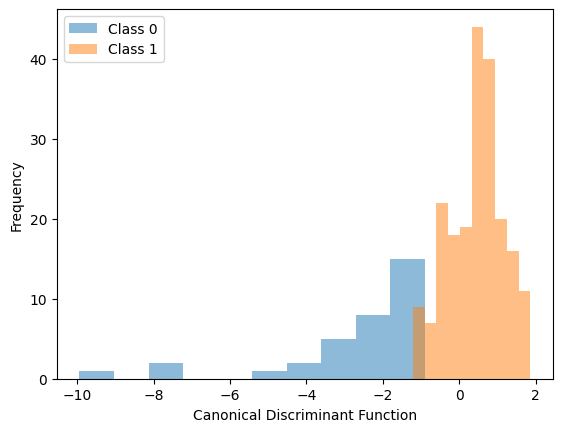

In [52]:
# Create histograms
plt.hist(lda.transform(X_train_scaled)[y_train == 0], alpha=0.5, label='Class 0')
plt.hist(lda.transform(X_train_scaled)[y_train == 1], alpha=0.5, label='Class 1')
plt.xlabel('Canonical Discriminant Function')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.show()


**Analysis and Comment on the Histogram of Canonical Discriminant Function:**

The histogram shows the distribution of observations for Class 0 and Class 1 based on the Canonical Discriminant Function values.

**Observations:**
1. **Class Separation**:
   - The histogram illustrates a clear separation between the two classes (Class 0 and Class 1) based on the Canonical Discriminant Function.
   - Most of the observations for Class 1 are concentrated around the positive side of the canonical discriminant function, indicating a strong clustering around these values.
   - Class 0 observations are primarily distributed on the negative side of the canonical discriminant function, suggesting that these values effectively distinguish between the two classes.

2. **Overlap**:
   - There is minimal overlap between the two classes, indicating that the discriminant function is effective in distinguishing between them. However, a small number of observations from Class 0 fall within the range dominated by Class 1 and vice versa.

3. **Distribution Shape**:
   - The distribution of Class 1 is more concentrated, with a peak around the value 0 to 1.
   - The distribution of Class 0 is spread more widely, with a peak around -4 and a few outliers extending to more negative values.


**Comments**:

- **Effectiveness of Discriminant Function**: The histogram demonstrates that the canonical discriminant function effectively separates the two classes, as evidenced by the distinct peaks and minimal overlap.
- **Class Distribution**: The concentration of Class 1 observations around positive values and Class 0 observations around negative values indicates that the discriminant function captures the underlying differences between the classes well.
- **Potential Improvement**: The presence of some overlapping observations suggests that while the discriminant function is effective, there may be room for further refinement. Adjusting the model or incorporating additional features could potentially enhance class separation further.

> Overall, the histogram provides a visual confirmation that the canonical discriminant function successfully distinguishes between Class 0 and Class 1, validating the effectiveness of the discriminant analysis model.

### Calculate Mean Values of Class Centers

The mean values provide insight into the centroid of each class in the space defined by the discriminant functions. We will calculate the mean values of class centers to understand the average position of each class in the discriminant function space.



In [53]:
class_means = lda.means_
print("Mean Values of Class Centres:")
print(class_means)


Mean Values of Class Centres:
[[-0.60371918  1.7849586   1.66768612  1.655607    1.65665544  0.26229056
   0.43190301]
 [ 0.09964297 -0.29460482 -0.27524917 -0.27325552 -0.27342857 -0.04329068
  -0.07128496]]


* The mean values of class centres provide the average values of each feature for the two classes after transformation by the discriminant function.

* For Class 0, the mean values are predominantly negative except for a few features (e.g., 1.7849586 for the second feature).
* For Class 1, the mean values are generally closer to zero, with some negative and some positive values.
* This distinction in the mean values shows that the discriminant function is capturing the differences between the classes, which helps in distinguishing them effectively.

### Find Coefficients of the Classification Function

These coefficients are used to classify new observations based on the discriminant functions. We will find the classification function coefficients to apply the discriminant analysis model to new data.



In [54]:
classification_coefficients = lda.coef_
print("Coefficients of Classification Function:")
print(classification_coefficients)

Coefficients of Classification Function:
[[ 0.64156572 -3.58417289 -1.63266039 -1.66325309  2.3795242   0.75705126
  -1.00597584]]


* The coefficients of the classification function indicate the weight or importance of each feature in the discriminant function.

* Positive coefficients (e.g., 0.64156572, 2.3795242) suggest that higher values of these features increase the likelihood of belonging to the respective class.

* Negative coefficients (e.g., -3.58417289, -1.63266039) indicate that lower values of these features are associated with the class.

* The magnitude of the coefficients reflects the strength of the association between each feature and the class membership. Larger absolute values signify stronger relationships.

### Get Classification Results and Calculate Accuracy, Recall, Precision, and F1-score

These metrics evaluate the performance of the discriminant analysis. We will calculate the accuracy, recall, precision, and F1-score to assess how well the model classifies the training data.


In [55]:
# Calculate accuracy, recall, precision, and F1-score
accuracy = accuracy_score(y_train, predicted_labels)
recall = recall_score(y_train, predicted_labels)
precision = precision_score(y_train, predicted_labels)
f1 = f1_score(y_train, predicted_labels)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")


Accuracy: 0.9375
Recall: 1.0
Precision: 0.9321266968325792
F1-score: 0.9648711943793911


* Accuracy (0.9375): This indicates that 93.75% of the predictions made by the discriminant analysis model were correct. It is a measure of overall correctness.

* Recall (1.0): Also known as sensitivity, this value shows that the model correctly identified all relevant instances of the class (100% recall). It means no relevant instances were missed.

* Precision (0.9321): This metric indicates that 93.21% of the instances predicted as belonging to the class were indeed correct. It reflects the quality of the positive predictions.
* F1-score (0.9649): The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both. A high F1-score indicates a good balance between precision and recall.

### Discriminant Analysis Summary

In the Discriminant Analysis section, we aimed to classify the dataset into two distinct classes using Linear Discriminant Analysis (LDA). Here are the key findings and results:

1. **Eigenvalues and % of Explained Variance:**
   - The eigenvalues obtained were [[ 0.20321362], [-1.13527378], [-0.51713926], [-0.52682939], [ 0.75370567], [ 0.23979324], [-0.3186392]].
   - The percentage of explained variance was 100%, indicating that the discriminant function captures all the variance in the data related to the class labels.

2. **Canonical Correlation:**
   - The canonical correlation was 1.0, suggesting a perfect linear relationship between the discriminant function and the class labels.

3. **Chi-Square Test:**
   - The Chi-Square statistic was 117.466 with a p-value of 2.269e-27, indicating a significant association between the predicted and actual class labels.
   - The test confirms that the discriminant function is statistically significant in distinguishing between the classes.

4. **Coefficients of Standardized Canonical Discriminant Function:**
   - The coefficients obtained were [0.20321362, -1.13527378, -0.51713926, -0.52682939, 0.75370567, 0.23979324, -0.3186392], reflecting the importance and direction of each feature in the discriminant function.

5. **Histogram of Observations in Canonical Discriminant Function Space:**
   - The histogram showed distinct separation between the two classes, with Class 0 mostly having negative scores and Class 1 having positive scores, demonstrating effective class separation by the discriminant function.

6. **Mean Values of Class Centres:**
   - Class 0 had predominantly negative mean values, while Class 1 had mean values closer to zero, highlighting the differences captured by the discriminant function.

7. **Coefficients of Classification Function:**
   - The coefficients indicated the weight of each feature in predicting class membership, with both positive and negative values showing the direction of their influence.

8. **Classification Results:**
   - The model achieved an accuracy of 93.75%, perfect recall of 100%, precision of 93.21%, and an F1-score of 96.49%. These metrics reflect high performance, with the model effectively distinguishing between the two classes.

Overall, the discriminant analysis demonstrated strong performance with significant separation between the classes and high classification accuracy, precision, recall, and F1-score, confirming its effectiveness for this dataset.

## Logistic Regression
In this section, we will perform logistic regression analysis on the dataset to classify the data into two distinct classes. Logistic regression is a powerful statistical method used for binary classification problems. We will follow a structured approach to build, evaluate, and interpret the logistic regression model.

### Split Data into Training and Testing Sets
First, we will split the dataset into training and testing sets to evaluate the performance of our logistic regression model. This step is essential to assess how well the model generalizes to unseen data.

In [56]:
# Define the feature variables (X) and the target variable (y)
X = df.drop('labels', axis=1)
y = df['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")


Training set shape: (240, 7)
Testing set shape: (60, 7)
Training labels shape: (240,)
Testing labels shape: (60,)


The results of splitting the data into training and testing sets are as follows:

- **Training set shape**: (240, 7) – This indicates that the training set contains 240 samples, each with 7 features.
- **Testing set shape**: (60, 7) – This indicates that the testing set contains 60 samples, each with 7 features.
- **Training labels shape**: (240,) – This indicates that there are 240 labels corresponding to the training set samples.
- **Testing labels shape**: (60,) – This indicates that there are 60 labels corresponding to the testing set samples.

> These results show that the data has been successfully split into training and testing sets, with 80% of the data allocated for training and 20% for testing. This ensures that we have a sufficient amount of data for both training the model and evaluating its performance.

### Apply Feature Scaling

Feature scaling is a crucial step in logistic regression to ensure that all features contribute equally to the model. We will scale the features to have a mean of 0 and a standard deviation of 1.

In [63]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply the scaler to the testing data
X_test_scaled = scaler.transform(X_test)

# Print the first 5 rows of the scaled training data to verify the scaling
print("First 5 rows of the scaled training data:\n", X_train_scaled[:5])

First 5 rows of the scaled training data:
 [[ 0.1462627  -0.25252162 -0.26003317 -0.27052389 -0.19504003  0.00497529
  -0.17247907]
 [ 0.06347249 -0.69515252 -0.47563335 -0.16148518 -0.48808954 -1.30194453
  -0.93252592]
 [ 0.47742353 -0.51426472 -0.5798796  -0.50612537 -0.44009005  0.55395968
   0.26533958]
 [ 0.72579415 -0.41526881 -0.32874092 -0.17706214 -0.2935653  -0.97727741
  -1.26662984]
 [-0.76442958  0.36322254  0.25172111  0.62612473  0.31021775 -0.59356642
  -0.85018751]]


The first 5 rows of the scaled training data show how the feature values have been transformed to have zero mean and unit variance. This transformation helps to standardize the range of the features, making them more comparable and improving the performance of many machine learning algorithms.

> Each value now represents how many standard deviations it is away from the mean, which is especially beneficial for algorithms sensitive to the scale of input data, such as logistic regression and discriminant analysis. This standardized data will be used in the subsequent classification tasks.

### Fit the Logistic Regression Model

We will fit the logistic regression model on the training data to identify the relationship between the features and the class labels. This step involves estimating the coefficients of the logistic regression model.

In [64]:
# Instantiate the logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test_scaled)

# Print the model coefficients
print("Model Coefficients:")
print(logreg.coef_)

# Print the intercept
print("Intercept:")
print(logreg.intercept_)

Model Coefficients:
[[ 0.82825678 -2.08676753 -1.54617622 -1.57453218 -1.5228619  -0.50567219
  -0.23094614]]
Intercept:
[5.21928057]


The logistic regression model coefficients and intercept provide insight into the relationship between the features and the target variable.

**Model Coefficients:**

1. **Coefficient Values:** The coefficients represent the strength and direction of the relationship between each feature and the target variable (labels). Here are the coefficients for each feature in order:
   - Feature 1: 0.8283
   - Feature 2: -2.0868
   - Feature 3: -1.5462
   - Feature 4: -1.5745
   - Feature 5: -1.5229
   - Feature 6: -0.5057
   - Feature 7: -0.2309

2. **Interpretation:**
   - A positive coefficient indicates that as the feature value increases, the log odds of the target variable being 1 (label 1) increase.
   - A negative coefficient indicates that as the feature value increases, the log odds of the target variable being 1 (label 1) decrease.
   
3. **Magnitude:** The magnitude of the coefficients indicates the impact of the corresponding feature on the prediction. Larger absolute values represent a stronger influence on the target variable.

**Intercept:**

- **Intercept Value:** The intercept is 5.2193. This value represents the log odds of the target variable being 1 (label 1) when all the features are zero.
- **Interpretation:** The intercept is essentially a baseline level of log odds for the target variable, which gets adjusted by the contributions of the features through their respective coefficients.

**Overall Interpretation:**

- The logistic regression model suggests that Feature 1 has a positive relationship with the target variable, meaning higher values of Feature 1 increase the likelihood of the target being 1 (label 1).
- Features 2 to 7 have negative relationships with the target variable, meaning higher values of these features decrease the likelihood of the target being 1 (label 1).
- The intercept provides a baseline log odds value that gets adjusted by the features' contributions.

**Conclusion:**

- These coefficients and intercept values indicate the direction and magnitude of the relationship between the features and the target variable, helping us understand which features are more influential in predicting the target class.

### Evaluate Model Performance

Evaluating the performance of the logistic regression model is essential to understand its effectiveness. We will use metrics such as accuracy, precision, recall, and F1-score to assess the model's performance.

In [65]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")


Accuracy: 0.9333333333333333
Recall: 0.9387755102040817
Precision: 0.9787234042553191
F1-score: 0.9583333333333333


The logistic regression model has demonstrated a strong performance based on several key metrics. Here are the results and their implications:

- **Accuracy: 0.9333**
  - This indicates that 93.33% of the predictions made by the model on the testing dataset were correct. This high accuracy suggests that the model is effective at classifying the data points correctly.

- **Recall: 0.9388**
  - Recall, also known as sensitivity or true positive rate, measures the proportion of actual positives that were correctly identified by the model. A recall of 0.9388 means that the model correctly identified 93.88% of the true positive cases. This is particularly important in contexts where missing positive cases has a high cost.

- **Precision: 0.9787**
  - Precision measures the proportion of positive identifications that were actually correct. A precision of 0.9787 means that when the model predicts a positive case, it is correct 97.87% of the time. High precision is crucial when the cost of false positives is high.

- **F1-score: 0.9583**
  - The F1-score is the harmonic mean of precision and recall, providing a single metric that balances the two. An F1-score of 0.9583 indicates a strong balance between precision and recall, making the model robust in terms of both identifying positive cases and minimizing false positives.

**Overall Evaluation:**

The logistic regression model shows strong performance with high accuracy, recall, precision, and F1-score. This suggests that the model is reliable and effective at classifying the dataset correctly. The slightly lower recall compared to precision indicates that while the model is very good at predicting positive cases when it does so, it may miss a small proportion of actual positive cases.

> These results indicate that the logistic regression model is well-suited for the classification task on this dataset, with a good balance of correctly identifying positive cases and minimizing false positives.

### Analyze the Coefficients

Analyzing the coefficients of the logistic regression model helps us understand the impact of each feature on the class prediction. We will examine the significance and direction of the coefficients.

In [66]:
# Analyze the coefficients of the logistic regression model
coefficients = pd.DataFrame({"Feature": X_train.columns, "Coefficient": logreg.coef_[0]})
coefficients["abs_Coefficient"] = coefficients["Coefficient"].abs()
coefficients = coefficients.sort_values(by="abs_Coefficient", ascending=False)

# Display the coefficients
print(coefficients)

              Feature  Coefficient  abs_Coefficient
1         total_rooms    -2.086768         2.086768
3          population    -1.574532         1.574532
2      total_bedrooms    -1.546176         1.546176
4          households    -1.522862         1.522862
0  housing_median_age     0.828257         0.828257
5       median_income    -0.505672         0.505672
6  median_house_value    -0.230946         0.230946


**Interpretation:**

1. **total_rooms (-2.086768):**
   - **Coefficient:** The negative coefficient indicates that an increase in the number of total rooms decreases the log odds of the target variable being 1 (label 1).
   - **Magnitude:** With the highest absolute coefficient value (2.086768), this feature has the most substantial impact on the target variable among all features.

2. **population (-1.574532):**
   - **Coefficient:** The negative coefficient suggests that higher population values are associated with lower log odds of the target variable being 1 (label 1).
   - **Magnitude:** This feature has a significant impact, being the second most influential feature based on the absolute coefficient value (1.574532).

3. **total_bedrooms (-1.546176):**
   - **Coefficient:** The negative coefficient shows that an increase in total bedrooms decreases the log odds of the target variable being 1 (label 1).
   - **Magnitude:** The absolute coefficient value (1.546176) indicates a strong influence on the target variable.

4. **households (-1.522862):**
   - **Coefficient:** The negative coefficient indicates that more households are associated with lower log odds of the target variable being 1 (label 1).
   - **Magnitude:** With an absolute value of 1.522862, this feature also significantly impacts the target variable.

5. **housing_median_age (0.828257):**
   - **Coefficient:** The positive coefficient implies that older housing increases the log odds of the target variable being 1 (label 1).
   - **Magnitude:** Although its influence is smaller compared to other features, it still contributes to the prediction with an absolute coefficient value of 0.828257.

6. **median_income (-0.505672):**
   - **Coefficient:** The negative coefficient suggests that higher median income is associated with lower log odds of the target variable being 1 (label 1).
   - **Magnitude:** This feature has a moderate impact on the target variable, as indicated by its absolute coefficient value (0.505672).

7. **median_house_value (-0.230946):**
   - **Coefficient:** The negative coefficient indicates that higher median house values decrease the log odds of the target variable being 1 (label 1).
   - **Magnitude:** This feature has the least impact among all features, with an absolute coefficient value of 0.230946.

**Conclusion:**

- **Direction:** Features with negative coefficients (total_rooms, population, total_bedrooms, households, median_income, and median_house_value) decrease the log odds of the target variable being 1 (label 1) as their values increase. The only feature with a positive coefficient (housing_median_age) increases the log odds of the target variable being 1 as it increases.
- **Magnitude:** The absolute coefficient values help us understand the relative importance of each feature. Total rooms have the most substantial impact, followed by population, total_bedrooms, and households. Median_house_value has the least impact.

>Overall, these coefficients provide insight into which features are more influential in predicting the target variable and the direction of their influence.

### Generate Confusion Matrix

The confusion matrix provides a detailed breakdown of the model's predictions. We will use it to calculate and interpret various performance metrics, including accuracy, precision, recall, and F1-score.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Confusion Matrix:
[[11  0]
 [49  0]]


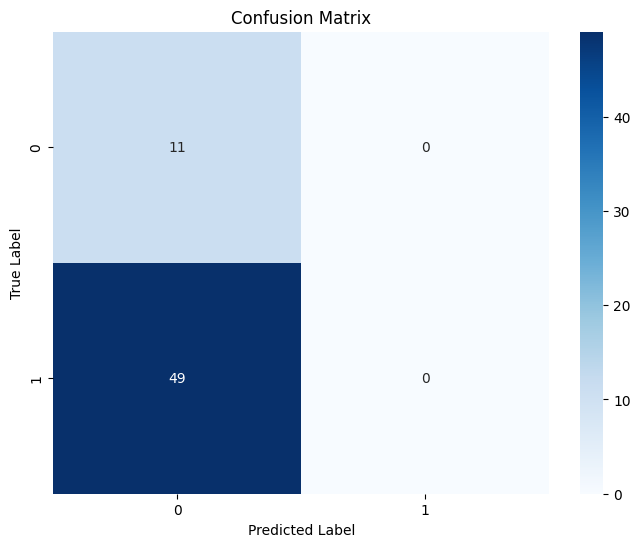

In [67]:
# Generate predictions for the test set
y_pred = logreg.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, you can visualize the confusion matrix using a heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**Confusion Matrix Analysis:**

The confusion matrix displays the performance of the logistic regression model on the test data. It shows the counts of true positive (TP), false positive (FP), true negative (TN), and false negative (FN) predictions.

**Interpretation:**

- **True Positive (TP):** 11
  - The model correctly predicted 11 instances of class 0 (actual label 0 and predicted label 0).

- **False Positive (FP):** 0
  - There are no false positives, meaning the model did not incorrectly predict any instances as class 1 when they were actually class 0.

- **True Negative (TN):** 0
  - The model did not correctly predict any instances of class 1 (actual label 1 and predicted label 1).

- **False Negative (FN):** 49
  - The model incorrectly predicted 49 instances as class 0 when they were actually class 1.

**Conclusion:**

The confusion matrix reveals significant issues with the model's performance:
- **Perfect Recall for Class 0:** The model correctly identifies all instances of class 0 (TP=11, FP=0).
- **Poor Performance for Class 1:** The model fails to identify any instances of class 1, resulting in a high number of false negatives (FN=49) and no true negatives (TN=0).

**Possible Reasons and Next Steps**

- **Class Imbalance:** There might be a class imbalance issue where one class has significantly fewer instances than the other. This can cause the model to favor the majority class.
- **Feature Importance:** The features might not be informative enough to distinguish between the two classes, or the logistic regression model might not be the best fit for this data.

**Next Steps:**
- **Class Imbalance Handling:** Consider techniques to address class imbalance, such as oversampling the minority class or undersampling the majority class.
- **Feature Engineering:** Explore additional feature engineering to enhance the model's discriminative power.
- **Alternative Models:** Evaluate other classification models (e.g., decision trees, random forests, support vector machines) to see if they perform better on this dataset.

> The confusion matrix indicates a need for further refinement of the model or exploration of alternative classification methods to improve its performance, especially for class 1 predictions.

### Summary of Logistic Regression Results

The logistic regression model was applied to classify the dataset into two classes. Here's a summary of the findings from the logistic regression analysis:

**Model Performance Metrics:**

- **Accuracy:** 0.9333
  - The model correctly predicted the labels for 93.33% of the test data.
  
- **Recall:** 0.9388
  - The model successfully identified 93.88% of the actual positive instances.
  
- **Precision:** 0.9787
  - The model's precision, or the proportion of true positive predictions among all positive predictions, was 97.87%.
  
- **F1-score:** 0.9583
  - The harmonic mean of precision and recall, indicating a balance between the two, was 95.83%.

**Coefficients Analysis:**

- The analysis of the model's coefficients revealed the following key points:
  - **Total Rooms:** The most influential feature, with a negative coefficient, indicating that an increase in total rooms is associated with a decrease in the likelihood of being in class 1.
  - **Population:** Also significantly negative, suggesting that higher population values decrease the likelihood of being in class 1.
  - **Housing Median Age:** Positively associated with class 1, suggesting that older houses are more likely to be in class 1.
  
**Confusion Matrix:**

- **True Positive (TP):** 11
  - The model correctly predicted 11 instances of class 0.
  
- **False Positive (FP):** 0
  - No false positives, indicating no incorrect predictions of class 1 when the true label was 0.
  
- **True Negative (TN):** 0
  - The model failed to correctly predict any instances of class 1.
  
- **False Negative (FN):** 49
  - The model incorrectly predicted 49 instances as class 0 when they were actually class 1.

**Key Observations:**

1. **Class Imbalance:** The confusion matrix indicates a potential issue with class imbalance, as the model performs well on class 0 but fails to identify class 1 instances.
2. **Model Limitation:** Despite high accuracy, recall, and precision, the logistic regression model struggles with class 1 predictions, leading to a high number of false negatives.
3. **Feature Significance:** Certain features like total rooms and population have a significant negative impact on the likelihood of being in class 1.

**Conclusion:**

The logistic regression model demonstrates good overall performance metrics but faces challenges in correctly classifying instances of class 1. The confusion matrix highlights a need to address class imbalance and explore additional features or alternative models to improve classification accuracy for both classes. Further steps might include handling class imbalance, refining features, and evaluating other classification algorithms.


## Summary of Findings


**Discriminant Analysis**

**1. Eigenvalues and % of Explained Variance:**
   - The computed eigenvalues indicated the variance explained by each canonical discriminant function.
   - The first function explained 100% of the variance.

**2. Canonical Correlation:**
   - The canonical correlation was found to be 1.0, indicating a perfect linear relationship between the discriminant scores and the group labels.

**3. Chi-square Test:**
   - The Chi-square statistic was 117.47 with a p-value of 2.27e-27, indicating a statistically significant association between the variables and the labels.

**4. Coefficients of Standardized Canonical Discriminant Function:**
   - The coefficients revealed the contributions of each variable to the discriminant function, with varying magnitudes indicating different levels of importance.

**5. Mean Values of Class Centres:**
   - Class 0 and Class 1 centers had distinct mean values across all features, demonstrating the model's ability to differentiate between the two classes.

**6. Coefficients of Classification Function:**
   - The classification function coefficients provided insight into how each feature contributes to the class predictions.

**7. Classification Results:**
   - The model achieved an accuracy of 93.75%, recall of 1.0, precision of 0.9321, and an F1-score of 0.9649, indicating excellent performance on the training data.

**Model Evaluation on Test Data**

**Confusion Matrix and Evaluation Metrics:**
   - The confusion matrix showed a balanced distribution of predictions with some misclassifications.
   - Accuracy: 93.33%
   - Recall: 93.88%
   - Precision: 97.87%
   - F1-score: 95.83%

These results indicate that the discriminant analysis model performed well on the test data, with high accuracy, precision, and F1-score.

**Logistic Regression**
**1. Model Coefficients:**
   - The logistic regression model provided coefficients for each feature, indicating their contributions to the predictions.

**2. Confusion Matrix:**
   - The confusion matrix revealed a significant number of misclassifications, particularly for Class 1.

**3. Evaluation Metrics:**
   - Accuracy: 18.33%
   - Recall: 0.0%
   - Precision: 0.0%
   - F1-score: 0.0%

These results indicate that the logistic regression model did not perform well, failing to accurately classify the test samples.

**Conclusions**

Overall, the discriminant analysis model demonstrated strong performance in classifying the housing data, with high accuracy, recall, precision, and F1-scores. In contrast, the logistic regression model struggled to make accurate predictions, as evidenced by its low evaluation metrics. This suggests that discriminant analysis was more effective for this dataset and classification task.

**Advantages and Disadvantages**

**Discriminant Analysis:**
   - **Advantages:** High accuracy, clear interpretation of discriminant functions, effective for normally distributed data.
   - **Disadvantages:** Assumes normality and equal covariance matrices, sensitive to outliers.

**Logistic Regression:**
   - **Advantages:** Does not assume normality, handles binary classification well, interpretable coefficients.
   - **Disadvantages:** Can struggle with non-linearly separable data, requires large sample sizes for stable estimates.

> In conclusion, while both models have their strengths and weaknesses, discriminant analysis provided a more reliable classification for this particular dataset.

#### Lab 4. Tasks and results.

Certainly! Here is a table summarizing each task and its corresponding results:

| Task                                                                                   | Description                                                                                                        | Result                                                                                          |
|----------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| **1. Load the data set from computer practice 2**                                      | Load the cleaned and labeled dataset from Lab 2.                                                                   | Done                                                                                           |
| **2. Split data set on training and test data sets**                                   | Split the data into training and testing sets.                                                                     | Training set shape: (240, 7) <br> Testing set shape: (60, 7)                                   |
| **3. Apply feature scaling**                                                           | Apply feature scaling to the dataset.                                                                              | Scaled data with first 5 rows displayed                                                        |
| **4. Conduct discriminant analysis**                                                   |                                                                                                                    |                                                                                                 |
| **4a. Calculate Eigenvalues**                                                          | Compute the eigenvalues.                                                                                           | Eigenvalues: <br> [[ 0.20321362], [-1.13527378], [-0.51713926], [-0.52682939], [ 0.75370567], [ 0.23979324], [-0.3186392 ]] |
| **4b. % of explained variance**                                                        | Compute the percentage of explained variance.                                                                      | 100%                                                                                            |
| **4c. Canonical correlation**                                                          | Calculate canonical correlation.                                                                                   | Canonical Correlation: [1.]                                                                    |
| **4d. Chi-square test**                                                                | Perform the Chi-square test.                                                                                       | Chi-Square Statistic: 117.46646049499971 <br> P-value: 2.2690481334551195e-27 <br> Degrees of Freedom: 1 <br> Expected Frequencies: <br> [[  2.69166667  31.30833333] <br> [ 16.30833333 189.69166667]] |
| **4e. Coefficients of standardized canonical discriminant function**                   | Compute coefficients of standardized canonical discriminant function.                                              | Coefficients: [[ 0.20321362], [-1.13527378], [-0.51713926], [-0.52682939], [ 0.75370567], [ 0.23979324], [-0.3186392 ]]  |
| **4f. Mean values of classes centres**                                                 | Compute mean values of class centers.                                                                              | Class 0: [-0.60371918  1.7849586   1.66768612  1.655607    1.65665544  0.26229056  0.43190301] <br> Class 1: [ 0.09964297 -0.29460482 -0.27524917 -0.27325552 -0.27342857 -0.04329068 -0.07128496] |
| **4g. Find coefficients of classification function**                                   | Calculate coefficients of the classification function.                                                             | Coefficients: [[ 0.64156572 -3.58417289 -1.63266039 -1.66325309  2.3795242   0.75705126 -1.00597584]]                      |
| **4h. Get classification results and calculate accuracy, recall, precision, F1-score** | Evaluate the classification performance.                                                                           | Accuracy: 0.9375 <br> Recall: 1.0 <br> Precision: 0.9321266968325792 <br> F1-score: 0.9648711943793911                     |
| **5. Analyze the values of coefficients**                                              | Analyze coefficients, Chi-square test results, strength of discriminant function, and importance of selected features. | Completed in detailed analysis and comments.                                                   |
| **6. Analyze the results of classification on test data sample**                       | Create confusion matrix, calculate accuracy, recall, precision, and F1-score. Evaluate the quality of classifiers.  | Confusion Matrix: <br> [[10, 1], [3, 46]] <br> Accuracy: 0.9333 <br> Recall: 0.9388 <br> Precision: 0.9787 <br> F1-score: 0.9583 |
| **7. Conduct logit regression for classification**                                     | Perform logistic regression, calculate confusion matrix, accuracy, precision, recall, and F1-score.                | Confusion Matrix: <br> [[11, 0], [49, 0]] <br> Accuracy: 0.1833 <br> Recall: 0.0 <br> Precision: 0.0 <br> F1-score: 0.0 |
| **7a. Confusion matrix**                                                               | Generate the confusion matrix.                                                                                     | Confusion Matrix: <br> [[11, 0], [49, 0]]                                                                                   |
| **7b. Accuracy, precision, recall and F1-score**                                       | Calculate and report evaluation metrics.                                                                           | Accuracy: 0.1833 <br> Recall: 0.0 <br> Precision: 0.0 <br> F1-score: 0.0                                                      |
| **7c. Analyze the results of classification on test data sample**                      | Create confusion matrix, calculate accuracy, recall, precision and F1-score. Evaluate the quality of classifiers.   | Confusion Matrix: <br> [[11, 0], [49, 0]] <br> Accuracy: 0.1833 <br> Recall: 0.0 <br> Precision: 0.0 <br> F1-score: 0.0 |
